In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
tf.set_random_seed(777) # reproducibility

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [10]:
# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing

keep_prob = tf.placeholder(tf.float32)

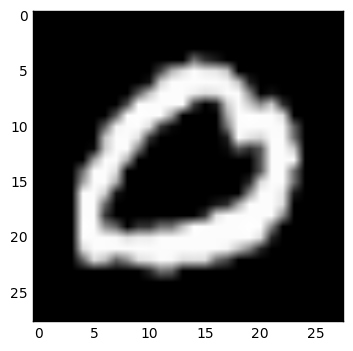

In [4]:
img = mnist.train.images[19].reshape(28,28)
plt.imshow(img, cmap='gray')

In [13]:
# input placeholder 
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # image B/W 28x28x1
Y = tf.placeholder(tf.float32, [None, 10])


# L1 imgIN shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

Tensor("Relu_3:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool_4:0", shape=(?, 14, 14, 32), dtype=float32)


<h1>Visualizing Layers</h1>

Tensor("Conv2D_1:0", shape=(1, 14, 14, 5), dtype=float32)


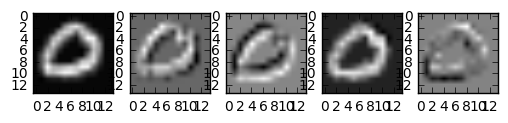

In [6]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


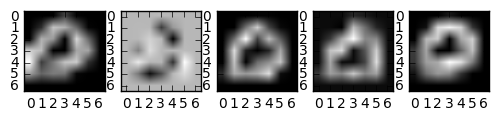

In [7]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

In [11]:
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

'\nTensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)\nTensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)\n'

In [14]:
# L2 imgIN shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob= keep_prob)
print(L2)

Tensor("Relu_4:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 7, 7, 64), dtype=float32)


In [ ]:
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''


In [15]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC

L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
print(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L3)
L3 = tf.nn.dropout(L3, keep_prob= keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])
print(L3)

Tensor("Relu_5:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_6:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_4:0", shape=(?, 2048), dtype=float32)


In [ ]:
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

In [15]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],initializer=tf.contrib.layers.xavier_initializer())

b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.add(tf.matmul(L3, W4), b4)
L4 = tf.nn.dropout(L4, keep_prob= keep_prob)

In [ ]:
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

In [16]:
W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

hypo = tf.add(tf.matmul(L4, W5), b5)

In [ ]:
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''


In [18]:
# define cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypo, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)


In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Learning stared. It takes sometime.
Epoch: 0001 cost = 0.420158038
Epoch: 0002 cost = 0.083931802
Epoch: 0003 cost = 0.060877119
Epoch: 0004 cost = 0.054586126
Epoch: 0005 cost = 0.048326398
Epoch: 0006 cost = 0.042603704
Epoch: 0007 cost = 0.040689065
Epoch: 0008 cost = 0.039592536
Epoch: 0009 cost = 0.038153288
Epoch: 0010 cost = 0.037795821
Epoch: 0011 cost = 0.035691268
Epoch: 0012 cost = 0.032677885
Epoch: 0013 cost = 0.033131376
Epoch: 0014 cost = 0.031735928
Epoch: 0015 cost = 0.031151593
Learning Finished!
Accuracy: 0.9937
Label:  [3]
Prediction:  [3]


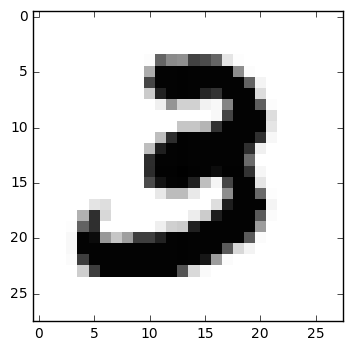

In [32]:
# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
                 X: batch_xs, Y: batch_ys, keep_prob: 0.7})
        avg_cost += sess.run(cost,
                             feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7}) / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypo, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypo, 1), {X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
sess.close()